In [1]:
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
import pandas as pd
labels_csv = pd.read_csv("labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [3]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

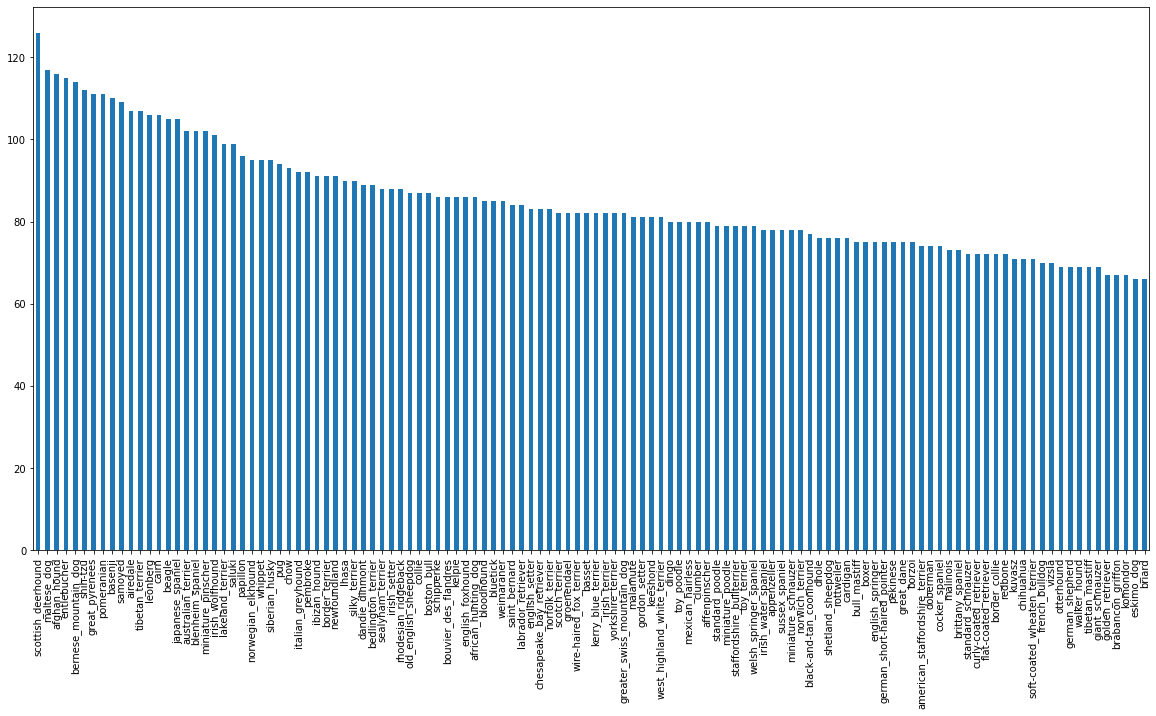

In [5]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [6]:
labels_csv["breed"].value_counts().median()

82.0

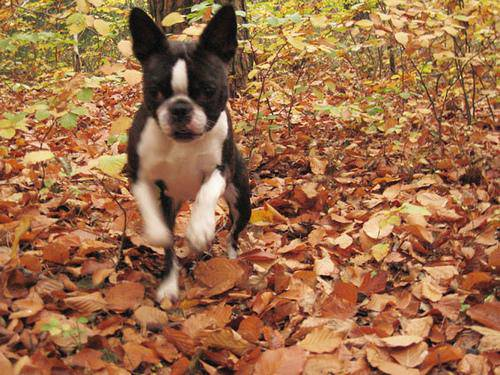

In [7]:
from IPython.display import Image
Image("train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [8]:
filenames = ["train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
import os
if len(os.listdir("train/")) == len(filenames):
  print("Filenames match actual amount of files")
else:
  print("Filenames does not match")

Filenames match actual amount of files


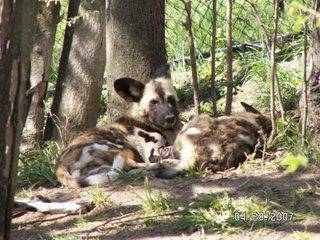

In [10]:
Image(filenames[50])

In [11]:
labels_csv["breed"][50]

'african_hunting_dog'

In [12]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
len(labels)

10222

In [14]:
if len(labels) == len(filenames):
  print("Matches")
else:
  print("Not Matches")

Matches


In [15]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [16]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [17]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [18]:
x = filenames
y = boolean_labels

In [19]:
NUM_IMAGES = 1000


from sklearn.model_selection import train_test_split


x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [20]:
x_train[:2], y_train[:2]

(['train/00bee065dcec471f26394855c5c2f3de.jpg',
  'train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, Fa

In [21]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [22]:
image.max(), image.min()

(255, 0)

In [23]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [24]:
# Define image size
IMG_SIZE = 224

# Create a functoin for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image filepath and turns the image into a Tensor
  """
  # Read in an image file
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical tensor with 3 colour channels
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired value(224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [25]:
# Create a simple function to written a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image filepath name and the associated label,
  processes the image and returns a tuplr of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [26]:
(process_image(x[12]), tf.constant(y[12]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.41515437, 0.19946808, 0.1720171 ],
         [0.37869743, 0.17085429, 0.13948174],
         [0.36193058, 0.15503281, 0.12334514],
         ...,
         [0.29701486, 0.10125153, 0.07380054],
         [0.29280463, 0.10064777, 0.07319678],
         [0.29280463, 0.10064777, 0.07319678]],
 
        [[0.40806067, 0.19237438, 0.1649234 ],
         [0.40548262, 0.19763945, 0.1662669 ],
         [0.37599018, 0.16909242, 0.13740474],
         ...,
         [0.28789535, 0.0939433 , 0.06649231],
         [0.28233546, 0.09017858, 0.06272759],
         [0.28233546, 0.09017858, 0.06272759]],
 
        [[0.4370794 , 0.22139311, 0.19394213],
         [0.43267584, 0.2248327 , 0.19346014],
         [0.39105853, 0.18416077, 0.15247308],
         ...,
         [0.28235295, 0.09019608, 0.0627451 ],
         [0.2784314 , 0.08627451, 0.05882353],
         [0.2784314 , 0.08627451, 0.05882353]],
 
        ...,
 
        [[0.14872189, 0.06765511

In [27]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn the data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label(y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  also accepts test data as input(no labels).
  """
  # If the data is test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  else:
    print("Creating training data batches..")
    # Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    # shuffling 
    data = data.shuffle(buffer_size=len(x))
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [28]:
# Creating training and validation batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches..
Creating validation data batches..


In [29]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [30]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

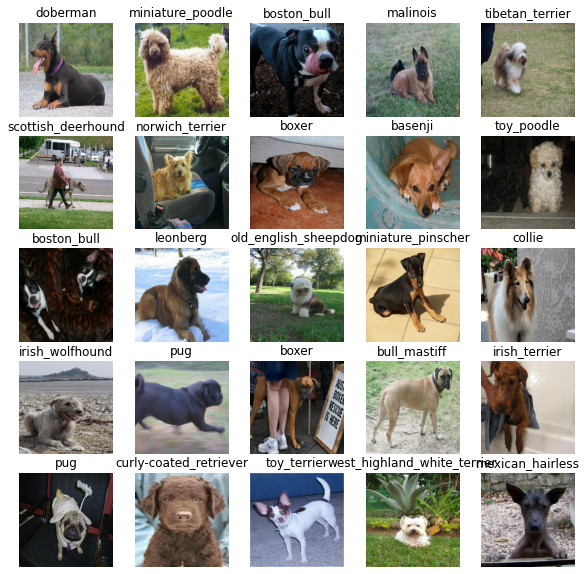

In [31]:
# Now let's visualize the data in the batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

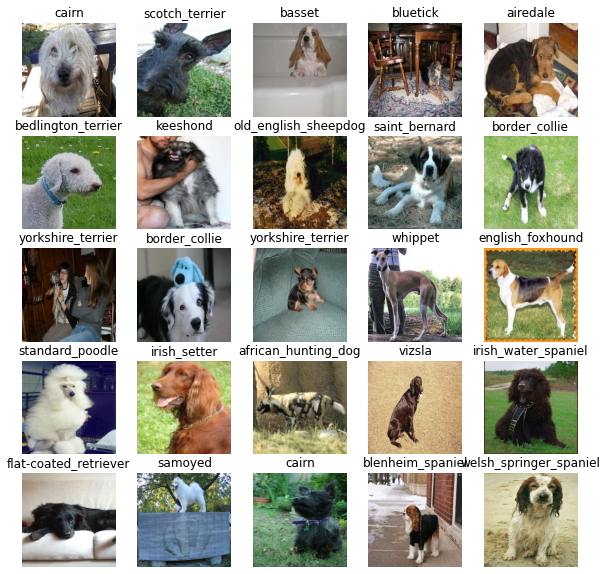

In [32]:
# Now let's visualize validation sets
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [33]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

# Setup the output shape to the model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [34]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL),
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax")
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)
  
  return model

In [35]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [36]:
%load_ext tensorboard

In [37]:
import datetime

# Create a function to build a TensorBoard call back
def create_tenserboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/Dog Breed Classification/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [38]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [39]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100}

In [40]:
# Build a function to train a model and returned a model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train amodel
  tensorboard = create_tenserboard_callback()

  # Fit the model
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  return model

In [41]:
# Fit the model to data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 50s 2s/step - loss: 4.5026 - accuracy: 0.1187 - val_loss: 3.3720 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 34s 1s/step - loss: 1.5866 - accuracy: 0.6938 - val_loss: 2.1038 - val_accuracy: 0.5350
Epoch 3/100
25/25 [==============================] - 33s 1s/step - loss: 0.5536 - accuracy: 0.9400 - val_loss: 1.6145 - val_accuracy: 0.5800
Epoch 4/100
25/25 [==============================] - 32s 1s/step - loss: 0.2491 - accuracy: 0.9900 - val_loss: 1.4455 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 34s 1s/step - loss: 0.1447 - accuracy: 0.9962 - val_loss: 1.3613 - val_accuracy: 0.6300
Epoch 6/100
25/25 [==============================] - 33s 1s/step - loss: 0.0997 - accuracy: 0.9987 - val_loss: 1.3127 - val_accuracy: 0.6450
Epoch 7/100
25/25 [==============================] - 35s 1s/s

In [42]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 8s 940ms/step


array([[1.1500585e-03, 1.4190529e-04, 9.1393222e-04, ..., 3.0311709e-04,
        1.3257338e-04, 2.5418450e-03],
       [9.2105651e-03, 2.9365619e-04, 5.7522184e-03, ..., 1.7896818e-03,
        5.9597781e-03, 7.0238410e-04],
       [4.3861975e-05, 1.5084192e-04, 1.5443355e-05, ..., 7.6645178e-05,
        9.8469973e-06, 2.0008222e-03],
       ...,
       [1.8120742e-06, 9.6150005e-05, 7.4101612e-05, ..., 3.2233842e-05,
        1.0669217e-04, 3.1396678e-05],
       [1.5788110e-03, 1.4715876e-04, 3.2407919e-05, ..., 2.2321461e-05,
        3.3691835e-05, 7.4445577e-03],
       [9.9340978e-04, 1.1034535e-04, 3.1264187e-03, ..., 2.5238257e-02,
        2.8477444e-03, 4.1943284e-05]], dtype=float32)

In [43]:
predictions[0]

array([1.15005847e-03, 1.41905286e-04, 9.13932221e-04, 4.76305613e-05,
       1.05641579e-04, 1.10116853e-05, 3.81588005e-03, 2.71973840e-04,
       2.11562019e-05, 2.63631635e-04, 6.44290936e-04, 1.53220444e-05,
       2.08553261e-04, 1.85195295e-05, 3.61048937e-04, 8.92411568e-04,
       7.68490718e-05, 4.47990745e-02, 7.41849817e-06, 1.91343170e-05,
       7.74028478e-04, 7.02919788e-04, 7.06327337e-05, 2.88325886e-04,
       3.59007026e-05, 1.96306122e-04, 1.99675709e-01, 5.01300274e-05,
       1.11008936e-04, 3.54134827e-04, 1.05457169e-04, 2.81972782e-04,
       1.97555695e-04, 4.45934129e-05, 3.06849870e-05, 7.78302103e-02,
       7.84458643e-06, 1.20674551e-04, 2.67939438e-04, 1.28557629e-04,
       3.78483761e-04, 5.72454810e-05, 1.96767476e-04, 2.54382758e-04,
       1.90265582e-05, 3.95402203e-05, 6.69924557e-05, 7.55051879e-05,
       1.43947516e-04, 1.52434804e-04, 1.88390433e-04, 1.17053560e-05,
       2.40170542e-04, 1.11521338e-04, 2.14592787e-04, 3.85129679e-05,
      

In [44]:
index = 0
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[0])}")
print(f"sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[1.15005847e-03 1.41905286e-04 9.13932221e-04 4.76305613e-05
 1.05641579e-04 1.10116853e-05 3.81588005e-03 2.71973840e-04
 2.11562019e-05 2.63631635e-04 6.44290936e-04 1.53220444e-05
 2.08553261e-04 1.85195295e-05 3.61048937e-04 8.92411568e-04
 7.68490718e-05 4.47990745e-02 7.41849817e-06 1.91343170e-05
 7.74028478e-04 7.02919788e-04 7.06327337e-05 2.88325886e-04
 3.59007026e-05 1.96306122e-04 1.99675709e-01 5.01300274e-05
 1.11008936e-04 3.54134827e-04 1.05457169e-04 2.81972782e-04
 1.97555695e-04 4.45934129e-05 3.06849870e-05 7.78302103e-02
 7.84458643e-06 1.20674551e-04 2.67939438e-04 1.28557629e-04
 3.78483761e-04 5.72454810e-05 1.96767476e-04 2.54382758e-04
 1.90265582e-05 3.95402203e-05 6.69924557e-05 7.55051879e-05
 1.43947516e-04 1.52434804e-04 1.88390433e-04 1.17053560e-05
 2.40170542e-04 1.11521338e-04 2.14592787e-04 3.85129679e-05
 3.16532823e-04 1.52589125e-03 1.60556199e-04 4.56712574e-01
 4.00654302e-04 1.43970727e-04 4.76644811e-04 3.58277175e-05
 9.65051644e-04 3.575179

In [45]:
unique_breeds[39]

'english_foxhound'

In [46]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

In [47]:
# Create a fuction to unbatch the batch datasets
def unbatch(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels
  """
  images = []
  labels = []

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatch the validation dataset
val_images, val_labels = unbatch(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [48]:
get_pred_label(predictions[0])

'irish_wolfhound'

In [49]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # get the pred label
  pred_label = get_pred_label(pred_prob)

  # plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #Change the color of the title 
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change the plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color = color)

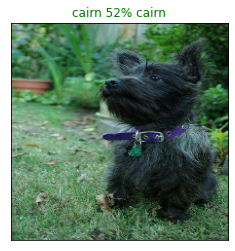

In [50]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=22)

In [51]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plot the highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 predicition confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup the plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels= top_10_pred_labels,
             rotation = "vertical")
  # Change the color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

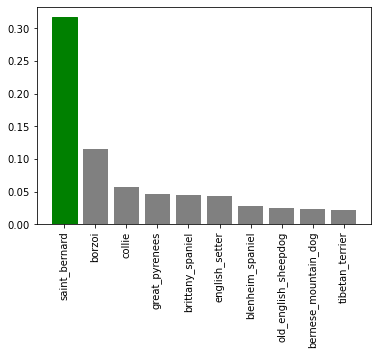

In [52]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=8)

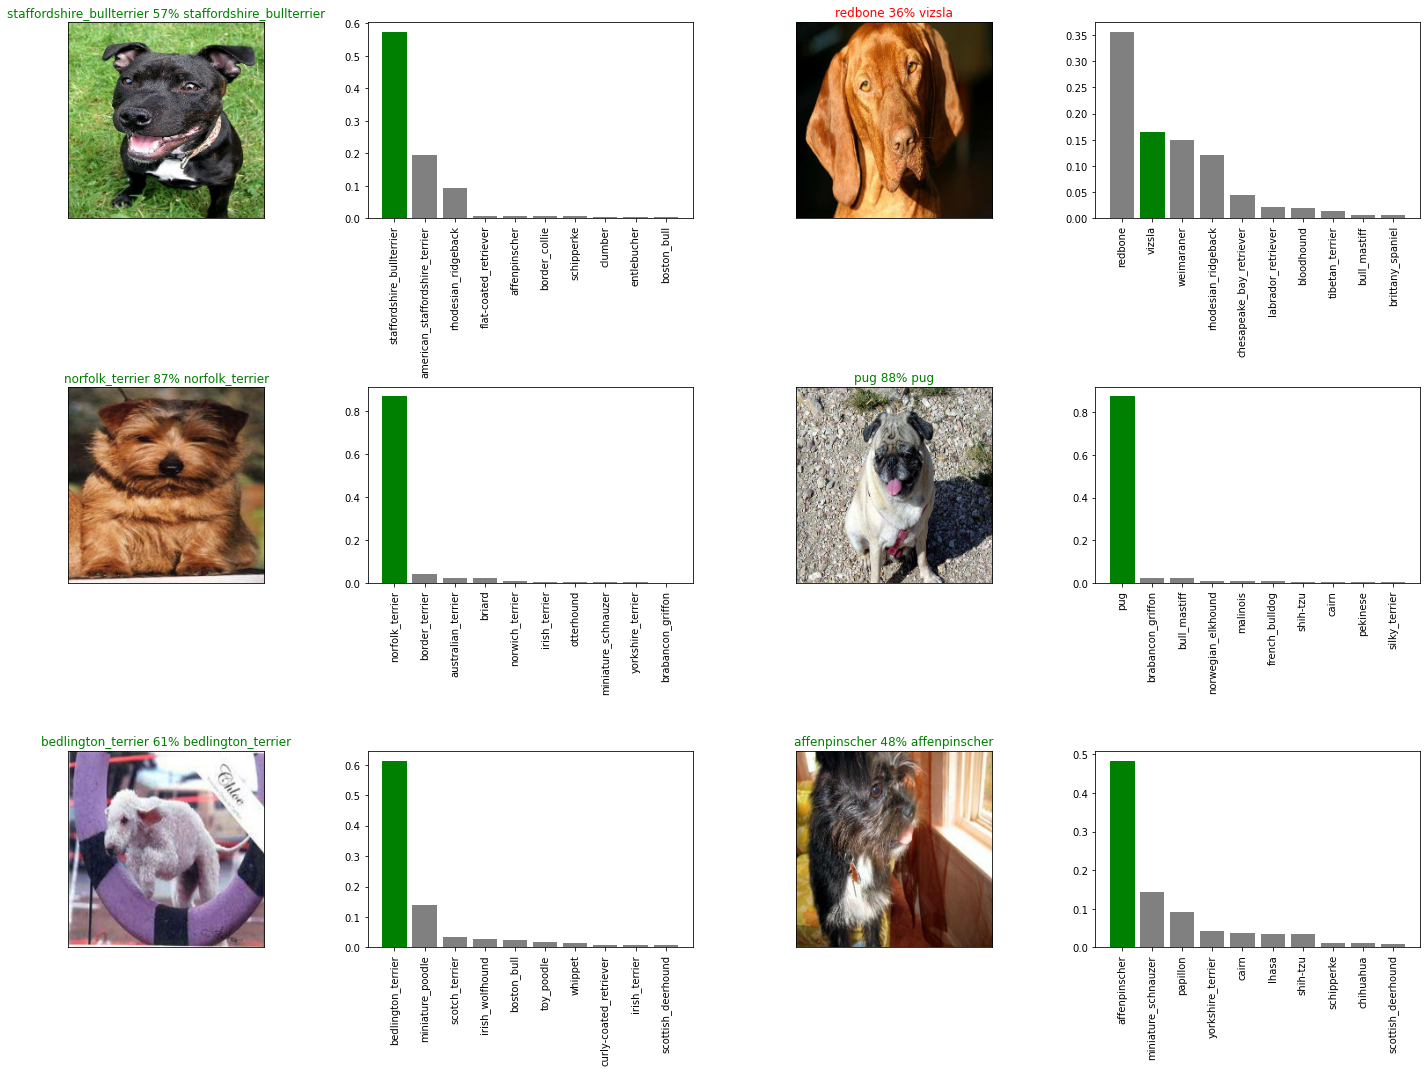

In [53]:
# Let's check out a few predictions and their different values
i_multiplier = 50
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [54]:
import os
# Create a functin to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string)
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join('models2')
  model_path = modeldir + "-" + suffix + ".h5"
  print(f"Saving model to: {model_path}")
  model.save(model_path)
  return model_path

In [55]:
# create a function to load a trained model
def load_model(model_path):
  """
  Loads a model from aspecified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                    custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [56]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-adam")

Saving model to: models-1000-images-mobilenetv2-adam.h5


'models-1000-images-mobilenetv2-adam.h5'

In [57]:
# Load a trained model
loaded_1000_image_model = load_model("models2-1000-images-mobilenetv2-adam.h5")

Loading saved model from: models-1000-images-mobilenetv2-adam.h5


In [58]:
model.evaluate(val_data)

7/7 [==============================] - 7s 971ms/step - loss: 1.2178 - accuracy: 0.6600


[1.2178034782409668, 0.6600000262260437]

In [59]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 8s 932ms/step - loss: 1.2178 - accuracy: 0.6600


[1.2178034782409668, 0.6600000262260437]

In [60]:
full_data = create_data_batches(x, y)

Creating training data batches..


In [61]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [62]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [63]:
# Create full model callbacks
full_model_tensorboard = create_tenserboard_callback()
# No validation set when training on all data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [64]:
# fit the model
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 248s 752ms/step - loss: 1.3368 - accuracy: 0.6697
Epoch 2/100
320/320 [==============================] - 204s 638ms/step - loss: 0.3960 - accuracy: 0.8838
Epoch 3/100
320/320 [==============================] - 206s 643ms/step - loss: 0.2361 - accuracy: 0.9370
Epoch 4/100
320/320 [==============================] - 204s 638ms/step - loss: 0.1522 - accuracy: 0.9639
Epoch 5/100
320/320 [==============================] - 204s 636ms/step - loss: 0.1050 - accuracy: 0.9805
Epoch 6/100
320/320 [==============================] - 201s 629ms/step - loss: 0.0766 - accuracy: 0.9876
Epoch 7/100
320/320 [==============================] - 201s 629ms/step - loss: 0.0589 - accuracy: 0.9911
Epoch 8/100
320/320 [==============================] - 200s 624ms/step - loss: 0.0465 - accuracy: 0.9938
Epoch 9/100
320/320 [==============================] - 200s 623ms/step - loss: 0.0375 - accuracy: 0.9963
Epoch 10/100
320/320 [==============================] -

In [65]:
save_model(full_model, suffix="Full-image-set-mobilenetv2-adam")

Saving model to: models-Full-image-set-mobilenetv2-adam.h5


'models-Full-image-set-mobilenetv2-adam.h5'

In [66]:
loaded_full_model = load_model("models2-Full-image-set-mobilenetv2-adam.h5")

Loading saved model from: models-Full-image-set-mobilenetv2-adam.h5


In [67]:
test_path = ("D:/ML_COURSE/Dog Breed Classification/test/")
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['D:/ML_COURSE/Dog Breed Classification/test/000621fb3cbb32d8935728e48679680e.jpg',
 'D:/ML_COURSE/Dog Breed Classification/test/00102ee9d8eb90812350685311fe5890.jpg',
 'D:/ML_COURSE/Dog Breed Classification/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'D:/ML_COURSE/Dog Breed Classification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'D:/ML_COURSE/Dog Breed Classification/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'D:/ML_COURSE/Dog Breed Classification/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'D:/ML_COURSE/Dog Breed Classification/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'D:/ML_COURSE/Dog Breed Classification/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'D:/ML_COURSE/Dog Breed Classification/test/002f80396f1e3db687c5932d7978b196.jpg',
 'D:/ML_COURSE/Dog Breed Classification/test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [68]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches..


In [69]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [70]:
# Make predictions on test data using the loaded full model
test_predictions = loaded_full_model.predict(test_data, verbose=1)

324/324 [==============================] - 237s 730ms/step


In [71]:
#pip install imageio

In [73]:
custom_path = "D:/ML_COURSE/Dog Breed Classification/dog_pics/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [74]:
custom_image_paths

['D:/ML_COURSE/Dog Breed Classification/dog_pics/images (1).jfif']

In [75]:
# Turn custom images into batch datasets 
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches..


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [76]:
custom_preds = loaded_full_model.predict(custom_data)

In [77]:
custom_preds.shape

(1, 120)

In [78]:
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['great_dane']

In [80]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

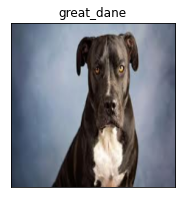

In [81]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
loaded_full_model = tf.keras.models.load_model("models-Full-image-set-mobilenetv2-adam.h5", custom_objects={"KerasLayer":hub.KerasLayer})

In [ ]:
import tkinter as tk
from PIL import ImageTk, Image
from tkinter import filedialog
import numpy as np
import tensorflow as tf
import os
import pandas as pd
labels_csv = pd.read_csv("labels.csv")
labels = labels_csv["breed"].to_numpy()
unique_breeds = np.unique(labels)

IMG_SIZE = 224
def process_image(image_path, img_size=IMG_SIZE):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]


BATCH_SIZE = 32
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch 
  else:
    print("Creating training data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    data = data.shuffle(buffer_size=len(x))
    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch

def load_img():
    global img, image_data
    for img_display in frame.winfo_children():
        img_display.destroy()

    image_data = filedialog.askopenfilename(initialdir="D:/ML_COURSE/Dog Breed Classification/dog_pics/", title="Choose an image",
                                       filetypes=(("all files", "*.*"), ("png files", "*.png")))
    basewidth = 350 # Processing image for dysplaying
    img = Image.open(image_data)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    file_name = image_data.split('/')
    panel = tk.Label(frame, text= str(file_name[len(file_name)-1]).upper(), bg='white').pack()
    panel_image = tk.Label(frame, image=img).pack()

def classify():
    #original = Image.open(image_data)
    #original = original.resize((224, 224), Image.ANTIALIAS)
    custom_path = "D:/ML_COURSE/Dog Breed Classification/dog_pics/"
    custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]
    custom_data = create_data_batches(custom_image_paths, test_data=True)
    custom_preds = loaded_full_model.predict(custom_data)
    custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
    label = custom_pred_labels[0]
    table = tk.Label(frame, text="The Breed of Dog is", font=("Comic Sans MS", 12), bg='white').pack()
    result = tk.Label(frame,text= str(label).upper(),  font=("Comic Sans MS", 20), bg='white').pack()
root = tk.Tk()
root.title('Dog Image Classifier')
root.resizable(False, False)
tit = tk.Label(root, text="Dog Image Classifier", padx=25, pady=6, font=("forte", 15)).pack()
canvas = tk.Canvas(root, height=500, width=500, bg='grey')
canvas.pack()
frame = tk.Frame(root, bg='white')
frame.place(relwidth=0.8, relheight=0.8, relx=0.1, rely=0.1)
chose_image = tk.Button(root, text='Choose Image',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=load_img)
chose_image.pack(side=tk.LEFT)
class_image = tk.Button(root, text='Classify Image',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=classify)
class_image.pack(side=tk.RIGHT)
root.mainloop()